<a href="https://colab.research.google.com/github/romanowiczadam/ml_course/blob/master/07_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision = 6, suppress = True, edgeitems = 30, linewidth = 120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'0.22.2.post1'

In [29]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30, random_state=42)

print(data.shape)
print(target.shape)

(100, 1)
(100,)


In [13]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [14]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

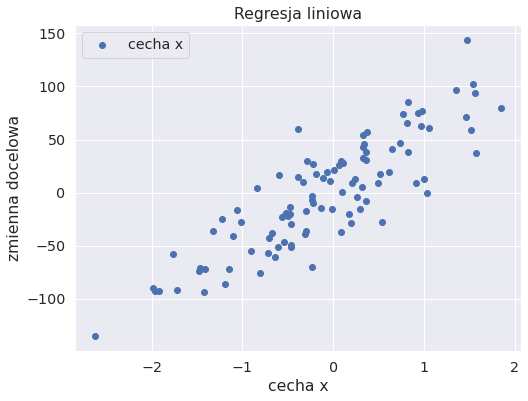

In [30]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.legend()
plt.plot()

In [35]:
# import klasy oraz utworzenie jej instancji
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# dopasowanie modelu liniowego do danych
regressor.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#dokonanie oceny moedlu za pomoca wskaznika R2 score
regressor.score(data, target)

0.7426670084336404

In [39]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

[]

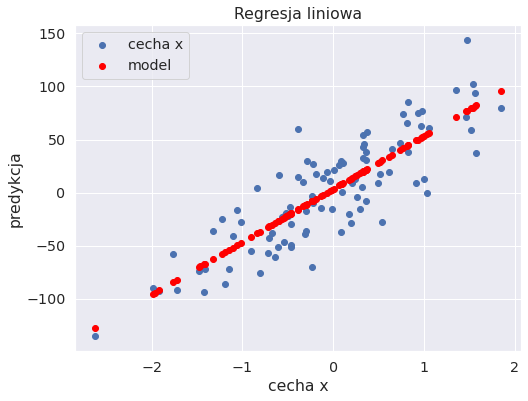

In [43]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('predykcja')
plt.scatter(data, target, label = 'cecha x')
plt.scatter(data, y_pred, color = 'red', label = 'model')
plt.legend()
plt.plot()

In [44]:
# wyswietlenie listy dostepnych atrybutow i metod na obiekcie regresji liniowej
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [45]:
regressor.coef_

array([49.83])

In [46]:
regressor.intercept_

3.4953459615809175

[]

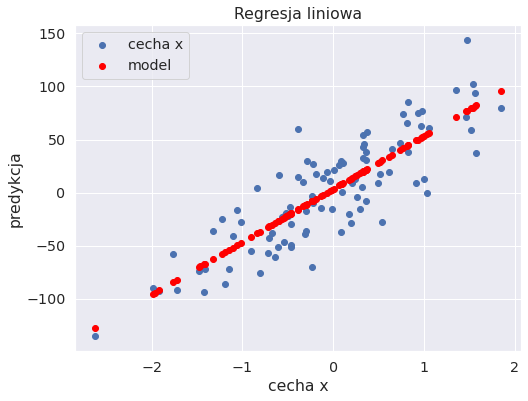

In [47]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('predykcja')
plt.scatter(data, target, label = 'cecha x')
plt.scatter(data, regressor.intercept_ + regressor.coef_[0]*data, color = 'red', label = 'model')
plt.legend()
plt.plot()

Regresja z podziałem na zbiór treningowy i testowy

In [48]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

print(data.shape)
print(target.shape)

(1000, 1)
(1000,)


In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(750, 1)
y train shape:(750,)
x test shape:(250, 1)
y test shape:(250,)


[]

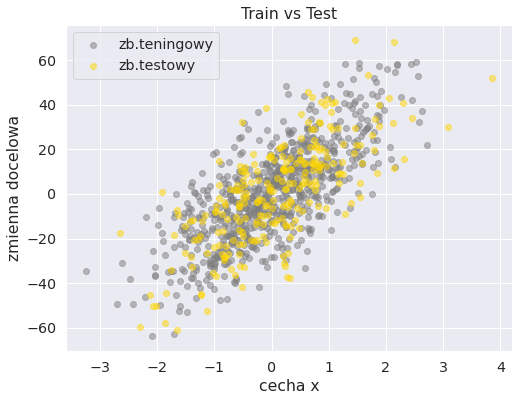

In [60]:
plt.figure(figsize=(8,6))
plt.title('Train vs Test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x_train, y_train, color='gray',  label = 'zb.teningowy',alpha= 0.5)
plt.scatter(x_test, y_test, color='gold',  label = 'zb.testowy', alpha= 0.5)
plt.legend()
plt.plot()

In [61]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
regressor.score(x_train, y_train)

0.551099616490903

In [68]:
regressor.score(x_test, y_test)

0.5248870087817927

[]

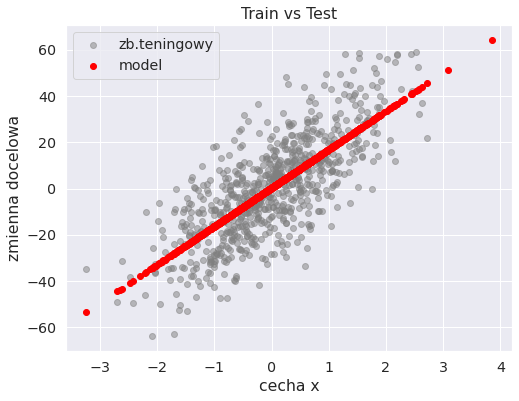

In [69]:
plt.figure(figsize=(8,6))
plt.title('Train vs Test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x_train, y_train, color='gray',  label = 'zb.teningowy',alpha= 0.5)
plt.scatter(data, regressor.intercept_ + regressor.coef_[0]*data, color = 'red', label = 'model')
plt.legend()
plt.plot()

[]

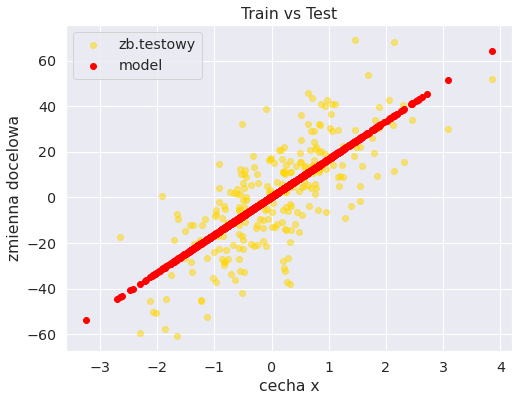

In [70]:
plt.figure(figsize=(8,6))
plt.title('Train vs Test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(x_test, y_test, color='gold',  label = 'zb.testowy', alpha= 0.5)
plt.scatter(data, regressor.intercept_ + regressor.coef_[0]*data, color = 'red', label = 'model')
plt.legend()
plt.plot()

Predykcja modelu

In [89]:
y_pred = regressor.predict(x_test)
y_pred

array([-15.03, -0.37, 24.42, -7.65, 16.37, 18.27, 9.24, 12.04, 7.36, 30.94, -9.28, -27.27, -22.92, -11.83, 4.52, 10.75,
       -13.25, -34.96, 24.62, 18.84, 25.82, 41.05, 1.92, -19.10, 14.40, 31.60, 13.34, 25.98, -15.90, 10.80, -5.12,
       5.79, -4.10, 5.46, -5.70, -14.95, 3.19, -34.02, -3.59, 5.68, 3.47, 12.68, -8.38, 14.06, 12.27, 5.51, -14.00,
       -24.85, -3.34, -0.25, -0.80, -3.94, 19.52, -8.75, 4.36, 8.84, -3.16, -22.57, -31.46, -4.81, 20.98, 8.16, -3.84,
       35.52, 5.91, -1.07, 0.64, 6.38, 14.14, -2.29, 13.27, -30.76, -9.07, -13.93, -10.94, -19.99, 2.46, -5.74, 15.67,
       -20.38, -12.71, 11.85, -13.50, -37.91, 24.78, -0.50, 3.85, -15.31, -7.83, 5.21, 11.68, 19.52, 3.67, 10.10,
       -13.52, 16.44, 5.90, -7.89, 4.78, -22.08, 7.66, 4.61, 11.22, -28.97, -15.93, 4.01, -3.81, -4.01, -8.06, -9.26,
       16.07, -7.21, -7.11, 64.24, 5.67, 5.96, -8.27, -20.94, 10.96, 30.38, 30.10, 24.31, 35.70, 5.72, 26.02, -9.23,
       4.15, 0.16, 19.87, 7.02, -24.85, 4.31, 26.62, -28.14, -

In [94]:
predictions = pd.DataFrame(data = {'y_true' : y_test, 'y_pred' : y_pred})
predictions

,y_true,y_pred
0,-1.925510,-15.028758
1,16.508262,-0.371802
2,29.483886,24.417460
3,-3.988284,-7.651367
4,16.362493,16.371934
...,...,...
245,22.584890,21.137298
246,11.319633,3.662766
247,1.918942,-10.537285
248,15.322190,8.813747


In [96]:
predictions['error'] = predictions['y_pred'] - predictions['y_true']
predictions

,y_true,y_pred,error
0,-1.925510,-15.028758,-13.103247
1,16.508262,-0.371802,-16.880064
2,29.483886,24.417460,-5.066426
3,-3.988284,-7.651367,-3.663083
4,16.362493,16.371934,0.009442
...,...,...,...
245,22.584890,21.137298,-1.447592
246,11.319633,3.662766,-7.656867
247,1.918942,-10.537285,-12.456227
248,15.322190,8.813747,-6.508443


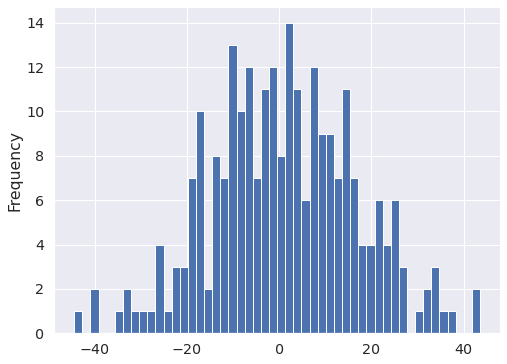

In [100]:
_ = predictions['error'].plot(kind= 'hist', bins = 50, figsize= (8,6))